<a href="https://colab.research.google.com/github/Hepzibha24/hepz/blob/main/Mulitple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.style

In [21]:
df=pd.read_csv('/content/Airbnb_NYC.csv')

In [22]:
df.head()

,Boroughs,Latitude,Longitude,Prop_Type,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price
0,Bronx,40.80011,-73.91330,PrivateRoom,21.0,2.0,291,19,0.27,60.0
1,Bronx,40.80024,-73.91422,PrivateRoom,3.0,1.0,0,59,2.93,49.0
2,Bronx,40.80074,-73.91574,PrivateRoom,3.0,1.0,354,3,0.87,50.0
3,Bronx,40.80091,-73.91449,PrivateRoom,21.0,2.0,117,18,0.36,71.0
4,Bronx,40.80143,-73.91353,EntireHome,2.0,3.0,0,12,3.50,115.0


In [23]:
df.shape

(38733, 10)

In [24]:
df.describe(include='all')

,Boroughs,Latitude,Longitude,Prop_Type,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price
count,38733,38733.000000,38733.000000,38733,38695.000000,38378.000000,38733.000000,38733.000000,38733.000000,38724.000000
unique,5,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,Brooklyn,NaN,NaN,EntireHome,NaN,NaN,NaN,NaN,NaN,NaN
freq,16436,NaN,NaN,20173,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,40.727848,-73.950735,NaN,5.523659,2.987545,114.234890,29.510650,1.365694,140.879248
std,NaN,0.055274,0.047167,NaN,10.817380,8.413190,130.182077,48.654548,1.692891,194.490892
min,NaN,40.506410,-74.244420,NaN,1.000000,1.000000,0.000000,1.000000,0.010000,10.000000
25%,NaN,40.688450,-73.982290,NaN,1.000000,1.000000,0.000000,3.000000,0.190000,68.000000
50%,NaN,40.721490,-73.954600,NaN,2.000000,1.000000,50.000000,10.000000,0.710000,100.000000
75%,NaN,40.762810,-73.934460,NaN,4.000000,2.000000,234.000000,33.000000,2.000000,169.000000


In [25]:
df = df.drop('Latitude', axis=1)

In [26]:
df.info

<bound method DataFrame.info of             Boroughs  Longitude    Prop_Type  Min_Nights  Host_Listing_Cnt  \
0              Bronx  -73.91330  PrivateRoom        21.0               2.0   
1              Bronx  -73.91422  PrivateRoom         3.0               1.0   
2              Bronx  -73.91574  PrivateRoom         3.0               1.0   
3              Bronx  -73.91449  PrivateRoom        21.0               2.0   
4              Bronx  -73.91353   EntireHome         2.0               3.0   
...              ...        ...          ...         ...               ...   
38728  Staten Island  -74.08502   EntireHome         2.0               1.0   
38729  Staten Island  -74.08734  PrivateRoom        20.0               1.0   
38730  Staten Island  -74.08408  PrivateRoom        30.0               4.0   
38731  Staten Island  -74.08682   EntireHome         3.0               1.0   
38732  Staten Island  -74.08460   EntireHome         1.0               1.0   

       Days_Available  Review_Cnt  Reviews30d  Price  
0                 291          19        0.27   60.0  
1                   0          59        2.93   49.0  
2                 354           3        0.87   50.0  
3                 117          18        0.36   71.0  
4                   0          12        3.50  115.0  
...               ...         ...         ...    ...  
38728             106          58        4.73  130.0  
38729              89          58        1.05   43.0  
38730               0          85        1.35  105.0  
38731             232           5        1.88  135.0  
38732             250         108        2.32  140.0  

[38733 rows x 9 columns]>

In [27]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

BOROUGHS :  5
Boroughs
Staten Island      328
Bronx              891
Queens            4695
Manhattan        16383
Brooklyn         16436
Name: count, dtype: int64


PROP_TYPE :  3
Prop_Type
SharedRoom       840
PrivateRoom    17720
EntireHome     20173
Name: count, dtype: int64




In [28]:
df.isnull().sum()

,0
Boroughs,0
Longitude,0
Prop_Type,0
Min_Nights,38
Host_Listing_Cnt,355
Days_Available,0
Review_Cnt,0
Reviews30d,0
Price,9


In [29]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)

df.isnull().sum()

,0
Boroughs,0
Longitude,0
Prop_Type,0
Min_Nights,0
Host_Listing_Cnt,0
Days_Available,0
Review_Cnt,0
Reviews30d,0
Price,0


In [31]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 1


In [32]:
print('Before',df.shape)
df.drop_duplicates(inplace=True)
print('After',df.shape)

Before (38733, 9)
After (38732, 9)


In [33]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0



Correlation Plot

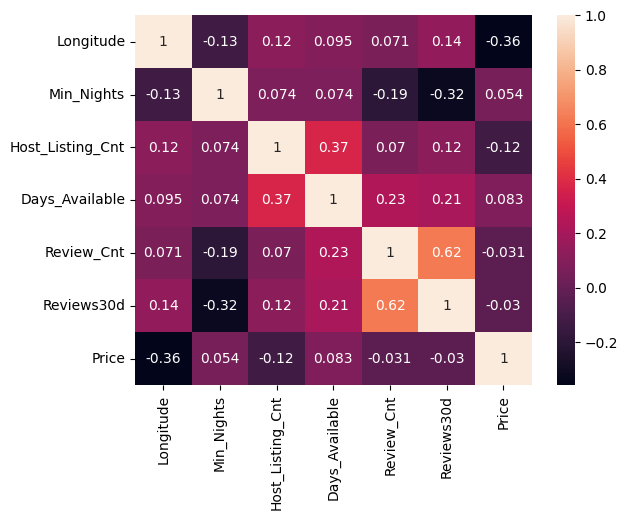

In [45]:
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True)
plt.show()

In [46]:
df.head()

,Boroughs,Longitude,Prop_Type,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price
0,Bronx,-73.91330,PrivateRoom,8.5,2.0,291.0,19.0,0.27,60.0
1,Bronx,-73.91422,PrivateRoom,3.0,1.0,0.0,59.0,2.93,49.0
2,Bronx,-73.91574,PrivateRoom,3.0,1.0,354.0,3.0,0.87,50.0
3,Bronx,-73.91449,PrivateRoom,8.5,2.0,117.0,18.0,0.36,71.0
4,Bronx,-73.91353,EntireHome,2.0,3.0,0.0,12.0,3.50,115.0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38732 entries, 0 to 38732
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Boroughs          38732 non-null  object 
 1   Longitude         38732 non-null  float64
 2   Prop_Type         38732 non-null  object 
 3   Min_Nights        38732 non-null  float64
 4   Host_Listing_Cnt  38732 non-null  float64
 5   Days_Available    38732 non-null  float64
 6   Review_Cnt        38732 non-null  float64
 7   Reviews30d        38732 non-null  float64
 8   Price             38732 non-null  float64
dtypes: float64(7), object(2)
memory usage: 3.0+ MB


Outlier Checks

/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/boxplot.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels, **kwargs)


<Figure size 1000x1000 with 0 Axes>

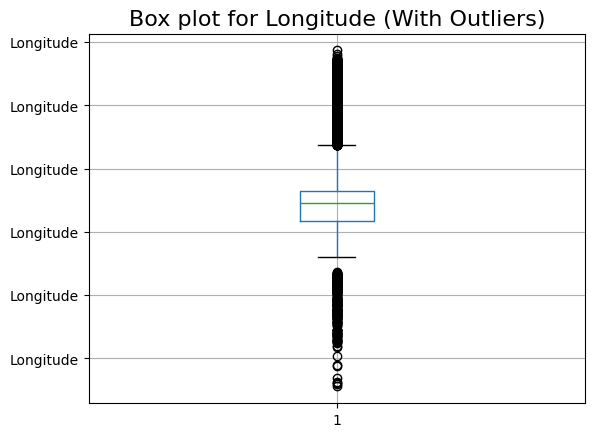

/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/boxplot.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels, **kwargs)


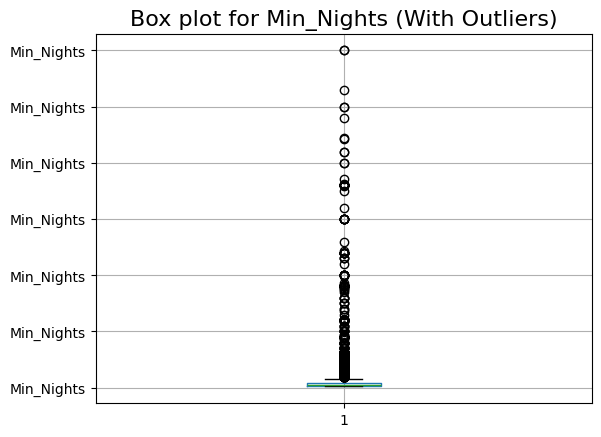

/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/boxplot.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels, **kwargs)


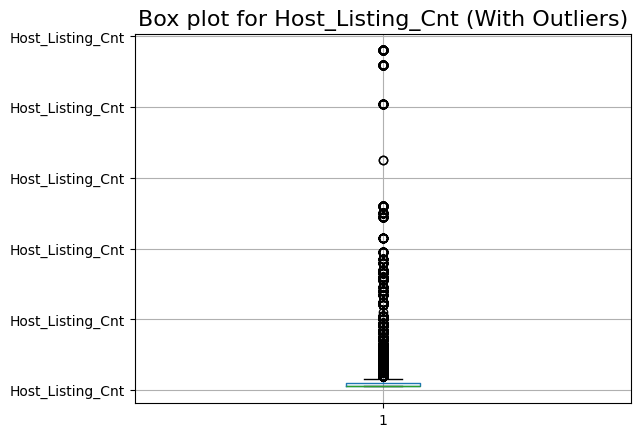

/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/boxplot.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels, **kwargs)


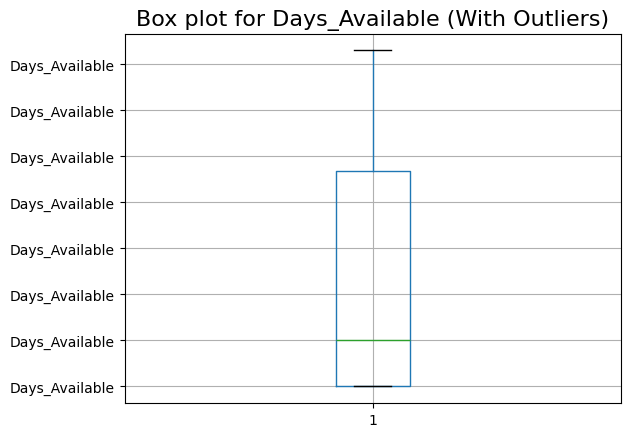

/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/boxplot.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels, **kwargs)


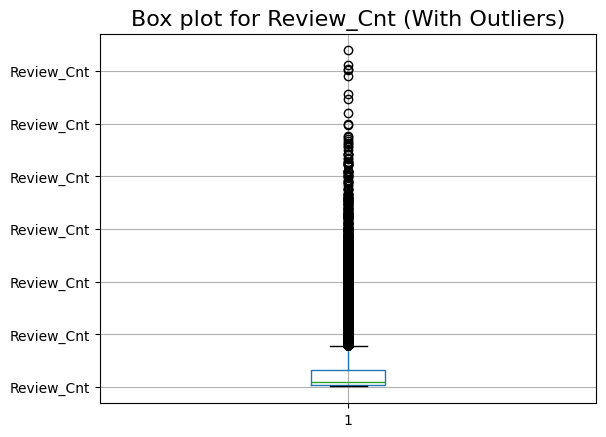

/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/boxplot.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels, **kwargs)


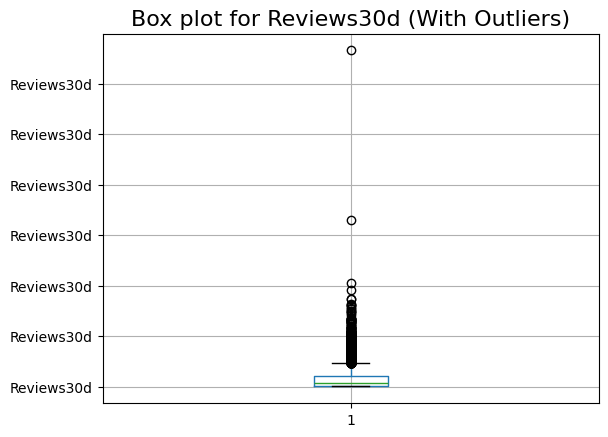

/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/boxplot.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels, **kwargs)


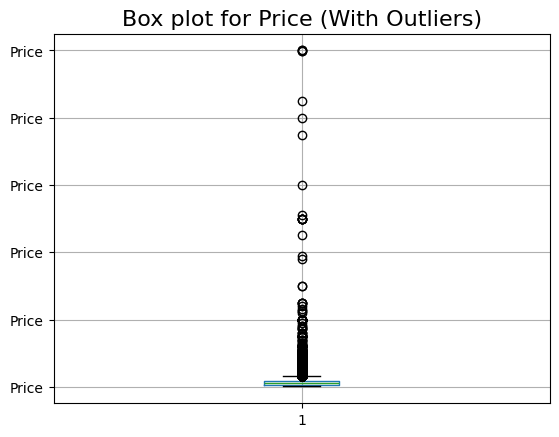

In [38]:
# construct box plot for continuous variables
cont = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(10, 10))
for column in cont:
    plt.figure() # Create a new figure for each box plot
    df.boxplot(column=column, vert=0)
    plt.title(f'Box plot for {column} (With Outliers)', fontsize=16)
    plt.show()

In [39]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [40]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/boxplot.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/boxplot.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/boxplot.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/boxplot.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels, **kwargs)


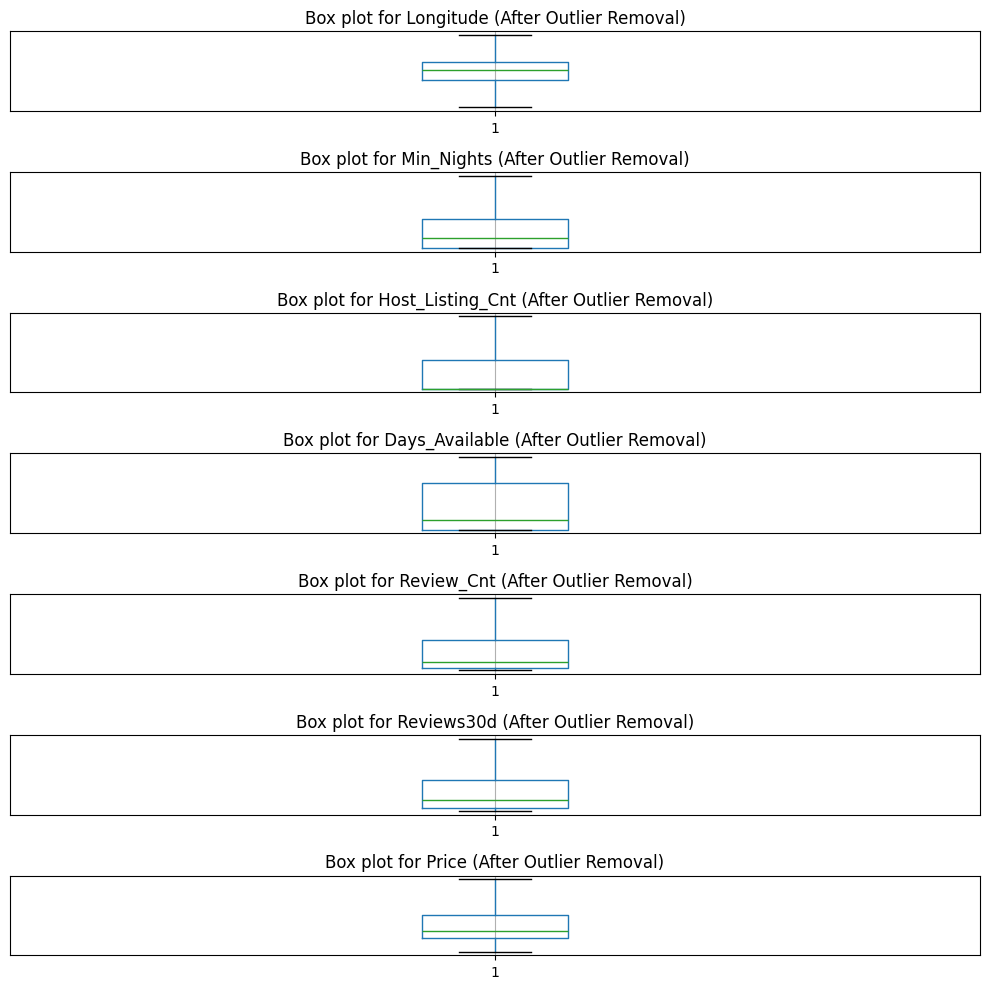

In [42]:
plt.figure(figsize=(10,10))
cont = df.select_dtypes(include=np.number).columns
for i, column in enumerate(cont):
    plt.subplot(len(cont), 1, i + 1)
    df.boxplot(column=column, vert=0)
    plt.title(f'Box plot for {column} (After Outlier Removal)', fontsize=12)
    plt.yticks([]) # Remove y-ticks as they are not needed for horizontal boxplots of single columns
plt.tight_layout()
plt.show()

data distribution

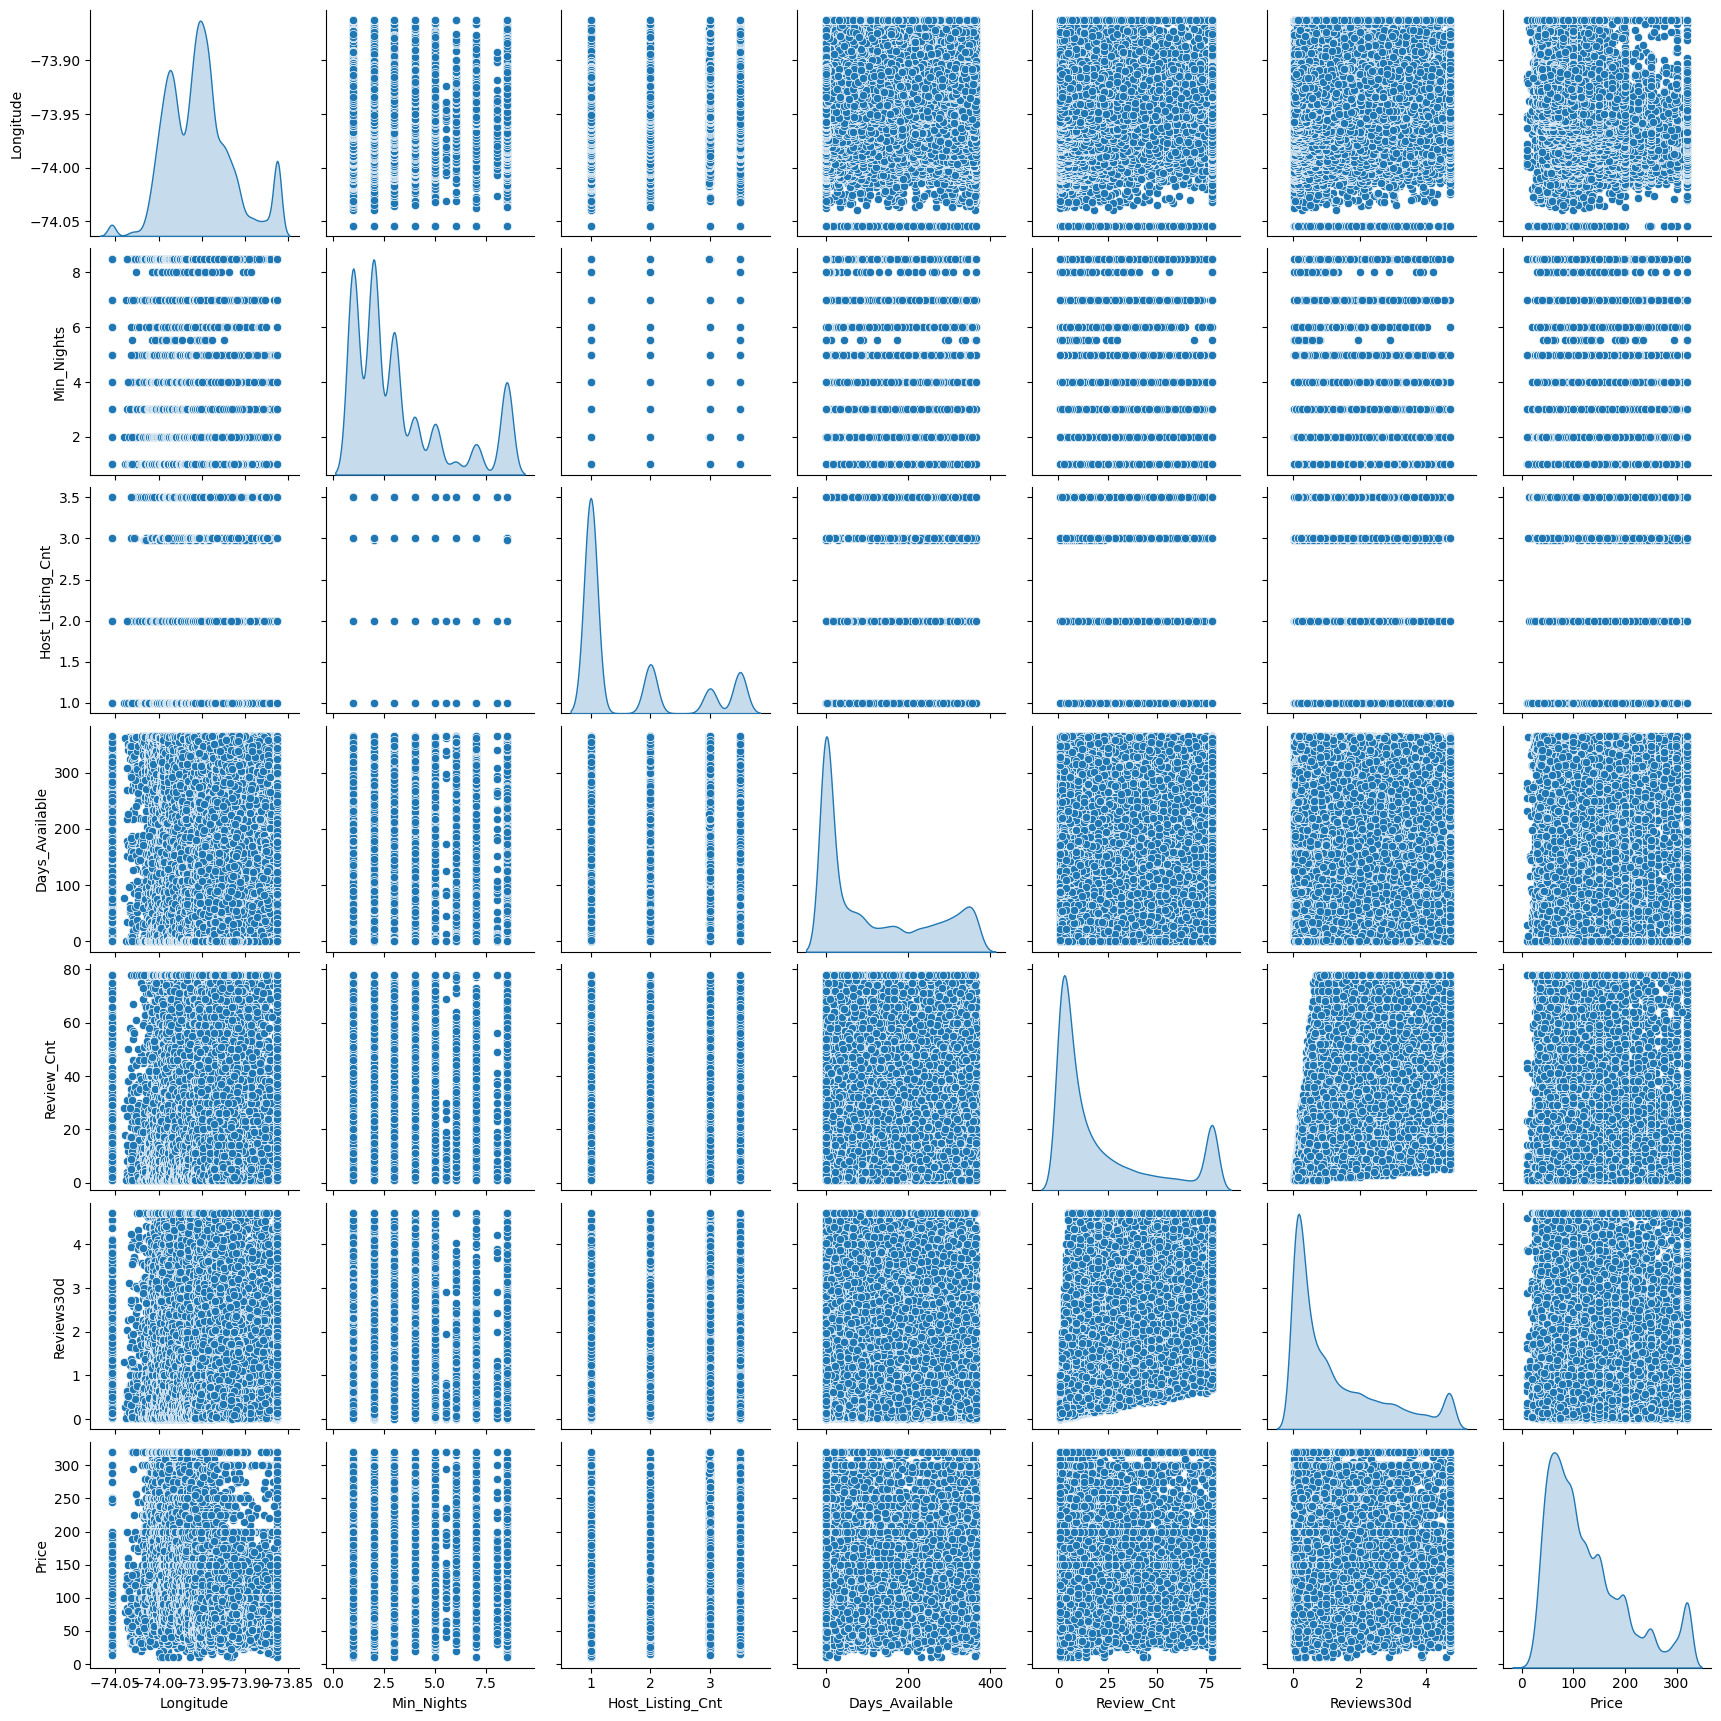

In [43]:
df_attr = (df[cont])
sns.pairplot(df_attr, diag_kind='kde')
plt.show()

Train-Test Split

In [49]:
# Copy all the predictor variables into X dataframe
X = df.drop('Price', axis=1)

# Copy target into the y dataframe.
y = df[['Price']]

In [51]:
X.head()

,Boroughs,Longitude,Prop_Type,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d
0,Bronx,-73.91330,PrivateRoom,8.5,2.0,291.0,19.0,0.27
1,Bronx,-73.91422,PrivateRoom,3.0,1.0,0.0,59.0,2.93
2,Bronx,-73.91574,PrivateRoom,3.0,1.0,354.0,3.0,0.87
3,Bronx,-73.91449,PrivateRoom,8.5,2.0,117.0,18.0,0.36
4,Bronx,-73.91353,EntireHome,2.0,3.0,0.0,12.0,3.50


In [52]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

Linear Regression Model


In [54]:
# Select categorical columns for one-hot encoding
categorical_cols = X_train.select_dtypes(include='object').columns

# Apply one-hot encoding to training and testing sets
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Initialize and train the Linear Regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [55]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Longitude is -550.1495409866299
The coefficient for Min_Nights is -3.534282040964637
The coefficient for Host_Listing_Cnt is -0.47354581302617066
The coefficient for Days_Available is 0.0906412812523647
The coefficient for Review_Cnt is -0.15704749985153227
The coefficient for Reviews30d is -0.009907720828174434
The coefficient for Boroughs_Brooklyn is -6.174754756667943
The coefficient for Boroughs_Manhattan is 16.37155015207689
The coefficient for Boroughs_Queens is 8.652419880704292
The coefficient for Boroughs_Staten Island is -96.63896443864209
The coefficient for Prop_Type_PrivateRoom is -85.22447613624257
The coefficient for Prop_Type_SharedRoom is -115.73591290042917


In [56]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -40515.51346659713


In [57]:
# R square on training data
regression_model.score(X_train, y_train)

0.48405436609783103

In [58]:
# R square on testing data
regression_model.score(X_test, y_test)

0.4780028236516073

In [60]:
#RMSE on Training data
from sklearn import metrics
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

np.float64(55.47659219837637)

In [61]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

np.float64(56.78257044693307)

Linear Regression using statsmodels(OLS)

In [62]:
import statsmodels.api as sm

In [63]:
X_train=sm.add_constant(X_train)# This adds the constant term beta0 to the Simple Linear Regression.
X_test=sm.add_constant(X_test)

In [65]:
# Ensure X_train and y_train are numeric
X_train = X_train.astype(float)
y_train = y_train.astype(float)

model = sm.OLS(y_train,X_train).fit()
model

In [66]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     2270.
Date:                Sat, 20 Sep 2025   Prob (F-statistic):               0.00
Time:                        14:20:21   Log-Likelihood:            -1.5788e+05
No. Observations:               29049   AIC:                         3.158e+05
Df Residuals:                   29036   BIC:                         3.159e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -4.052e+04    998.283    -40.585      0.000   -4.25e+04   -3.86e+04
Longitude               -550.1495     13.509    -40.725      0.000    -576.628    -523.671
Min_Nights                -3.5343      0.150    -23.615      0.000      -3.828      -3.241
Host_Listing_Cnt          -0.4735      0.396     -1.197      0.231      -1.249       0.302
Days_Available             0.0906      0.003     32.302      0.000       0.085       0.096
Review_Cnt                -0.1570      0.016     -9.741      0.000      -0.189      -0.125
Reviews30d                -0.0099      0.317     -0.031      0.975      -0.631       0.611
Boroughs_Brooklyn         -6.1748      2.373     -2.602      0.009     -10.826      -1.524
Boroughs_Manhattan        16.3716      2.492      6.570      0.000      11.487      21.256
Boroughs_Queens            8.6524      2.356      3.673      0.000       4.035      13.270
Boroughs_Staten Island   -96.6390      4.761    -20.296      0.000    -105.972     -87.306
Prop_Type_PrivateRoom    -85.2245      0.701   -121.581      0.000     -86.598     -83.851
Prop_Type_SharedRoom    -115.7359      2.314    -50.017      0.000    -120.271    -111.201
==============================================================================
Omnibus:                     4974.181   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9225.931
Skew:                           1.077   Prob(JB):                         0.00
Kurtosis:                       4.727   Cond. No.                     5.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
#Calculate MSE on train
predicted_train=model.predict(X_train)
mse=metrics.mean_squared_error(y_train,predicted_train)

In [68]:
np.sqrt(mse) #RMSE on train

np.float64(55.47659219837627)

In [69]:
# Prediction on Test data
y_pred = model.predict(X_test)

In [70]:
#Calculate MSE on test
mse=metrics.mean_squared_error(y_test,y_pred)
np.sqrt(mse) #RMSE on test

np.float64(56.78257044693358)

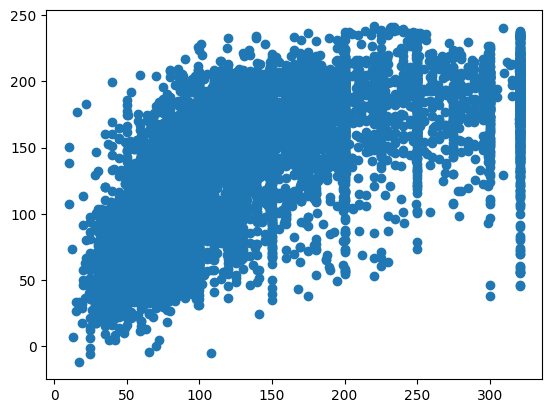

In [71]:
plt.scatter(y_test, y_pred)
plt.show()


In [72]:
for i,j in np.array(model.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-40515.51) * const + (-550.15) * Longitude + (-3.53) * Min_Nights + (-0.47) * Host_Listing_Cnt + (0.09) * Days_Available + (-0.16) * Review_Cnt + (-0.01) * Reviews30d + (-6.17) * Boroughs_Brooklyn + (16.37) * Boroughs_Manhattan + (8.65) * Boroughs_Queens + (-96.64) * Boroughs_Staten Island + (-85.22) * Prop_Type_PrivateRoom + (-115.74) * Prop_Type_SharedRoom + 